# Clustering - K-means



## Import libraries
---

In [1]:
import pandas as pd                               # For dataframes
import matplotlib.pyplot as plt                   # For plotting data
import seaborn as sns                             # For plotting data
from sklearn.cluster import KMeans                # For k-Means
from sklearn.model_selection import GridSearchCV  # For grid search
from sklearn.metrics import silhouette_score      # For metrics and scores
from sklearn.preprocessing import StandardScaler  # For standardizing data
import numpy as np

# Load and prepare data
Read the `penguins.csv` file from the `data` directory in variable `df`. Keep all features in variable `df` and store the class variable in `y`. Also, standardize the data so each variable has a mean of zero and unit variance (i.e., variance and standard deviation of one).

In [2]:
# Reads the .csv file into variable df
df = pd.read_csv('./datasets/penguins.csv')

# Separates the class variable in y
y = df.y

# Removes the y column from df
df = df.drop('y', axis=1)

# Standardizes df
df = pd.DataFrame(
    StandardScaler().fit_transform(df),
    columns=df.columns)

# Displays the first 5 rows of df
df.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,-0.884499,0.785449,-1.418347,-0.564142
1,-0.811126,0.126188,-1.062250,-0.501703
2,-0.664380,0.430462,-0.421277,-1.188532
3,-1.324737,1.089724,-0.563715,-0.938776
4,-0.847812,1.748985,-0.777373,-0.689020


## Running k-means
---

### k-Means: Train the Model
We'll set up a `KMeans` object with the following parameters:

- `n_clusters`: Total number of clusters to make.
- `random_state`: Set to one to reproduce these results.
- `init`: How to initialize the k-means centers; we'll use `k-means++`.
- `n_init`: Number of times k-means would be run; the model returned would have the minimum value of `inertia`.

A few attributes of the `KMeans` object, which are also used in this demo are:
- `cluster_centers_`: Stores the discovered cluster centers.
- `labels_`: Label of each instance.
- `inertia`: Sum of square of distances of each instance from its corresponding center.
- `n_iter`: Number of iterations run to find the centers.

In [3]:
# Sets up the kMeans object
km = KMeans(
    n_clusters=3,
    random_state=1,
    init='k-means++',
    n_init=10)

# Fits the model to the data
km.fit(df)

# Displays the parameters of the fitted model
km.get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 3,
 'n_init': 10,
 'n_jobs': 'deprecated',
 'precompute_distances': 'deprecated',
 'random_state': 1,
 'tol': 0.0001,
 'verbose': 0}

### k-Means: Visualize the Clusters

The code below creates a scatterplot of the first two features. Each point is colored according to its actual label. For comparison, each instance is drawn with a marker according to the label found by the clustering algorithm.

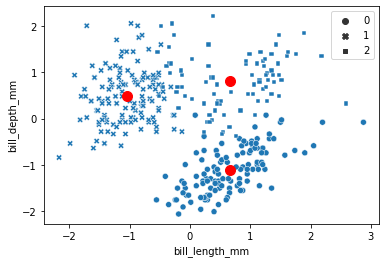

In [4]:
# Creates a scatter plot
sns.scatterplot(
    x='bill_length_mm', 
    y='bill_depth_mm',
    data=df, 
    #hue=y,
    style=km.labels_,
    palette=["green", "orange", "blue"])
# Adds cluster centers to the same plot
plt.scatter(
    km.cluster_centers_[:,0],
    km.cluster_centers_[:,1],
    marker='o',
    s=100,
    c='red')


## k-means: Optimize via silhouette scores
---
The main challenge in k-means is to find the optimal number of clusters. We can set up a `GridSearchCV` object to search for the optimal parameters. For k-Mmeans, we require a custom scorer that computes the silhouette value for different number of clusters specified by `n_clusters`. The custom scorer is called `s2()` in the code below, where it uses `silhouette_score()` from the `sklearn.metrics` library to compute a score for an instance `X`. 

A silhouette score is a value in [-1,+1]. It is a means for comparing how similar an instance is to its corresponding cluster compared to its similarity with other clusters. Formally, it takes into account `cohesion` and `separation` to compute a silhouette value. A +1 or close to this score value indicates better clusters.

In [5]:
# Sets up the custom scorer
def s2(estimator,X):
    return silhouette_score(X, estimator.predict(X))

# List of values for the parameter `n_clusters`
param = range(2,10)

# KMeans object
km = KMeans(random_state=0, init='k-means++')

# Sets up GridSearchCV object and stores in grid variable
grid = GridSearchCV(
    km,
    {'n_clusters': param},
    scoring=s2,
    cv=2)

# Fits the grid object to data
grid.fit(df)

# Accesses the optimum model
best_km = grid.best_estimator_

# Displays the optimum model
best_km.get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 2,
 'n_init': 10,
 'n_jobs': 'deprecated',
 'precompute_distances': 'deprecated',
 'random_state': 0,
 'tol': 0.0001,
 'verbose': 0}

## Plot of Scores for Different Number of Clusters
The `grid` object has an attribute `cv_results_` through which the scores for different `n_clusters` can be accessed.

Text(0, 0.5, 'Silhouette Score')

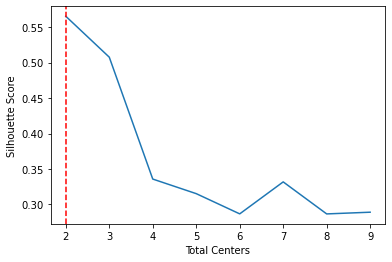

In [6]:
# Plot mean_test_scores vs. n_clusters
plt.plot(
    param,
    grid.cv_results_['mean_test_score'])

# Draw a vertical line, where the best model is
plt.axvline(
    x=best_km.n_clusters, 
    color='red',
    ls='--')

# Adds labels to the plot
plt.xlabel('Total Centers')
plt.ylabel('Silhouette Score')

## Visualize the Best Model
Code below creates a visualization of the clusters stored in the optimum model `best_km`.

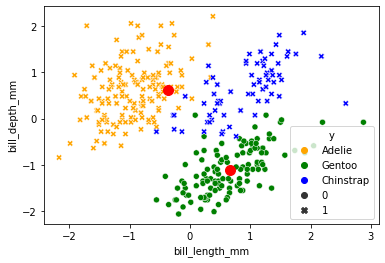

In [7]:
# Creates a scatter plot
sns.scatterplot(
    x='bill_length_mm', 
    y='bill_depth_mm',
    data=df, 
    hue=y,
    style=best_km.labels_,
    palette=['orange', 'green', 'blue'])

# Adds cluster centers to the same plot
plt.scatter(
    best_km.cluster_centers_[:, 0],
    best_km.cluster_centers_[:, 1],
    marker='o',
    s=100,
    c='red')

In [8]:
km = KMeans(n_clusters=2)
y_predicted = km.fit_predict(df[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']])
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [9]:
df["cluster"]= y_predicted

In [19]:
df

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,cluster
0,-0.884499,0.785449,-1.418347,-0.564142,1
1,-0.811126,0.126188,-1.062250,-0.501703,1
2,-0.664380,0.430462,-0.421277,-1.188532,1
3,-1.324737,1.089724,-0.563715,-0.938776,1
4,-0.847812,1.748985,-0.777373,-0.689020,1
...,...,...,...,...,...
337,2.178824,1.343286,0.433355,-0.251947,1
338,-0.077396,0.481175,0.077258,-1.001215,1
339,1.041543,0.531887,-0.563715,-0.532923,1
340,1.261662,0.937586,0.647013,-0.127069,1
